# Virtual Rat Switch cost vs. time under different pro to anti / anti to pro proportion

In [6]:
import numpy as np
import cPickle
import matplotlib.pyplot as plt

from VirtualRatFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (6.0, 4.5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Pro to anti proportion = 0

In [7]:
epoch_per_loop = 100
num_loop = 101
pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
    = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
for i in range(10,110,10):
    try:
        matrices = load_weights("RatioTime/RatioTime-0.0-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
    anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
    pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
    anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]

In [8]:
threshold1= 0.9
threshold2=0.7
threshold3 = 0.95
good = np.logical_and(pro_block_matrix[:,-1] > threshold1,  anti_block_matrix[:,-1] > threshold1)
bad = np.logical_not(good)
criteria1 = np.logical_or(pro_switch_matrix[:,40] < threshold2, anti_switch_matrix[:,40] < threshold2)
criteria2 = np.logical_or(pro_switch_matrix[:,95] < threshold3, anti_switch_matrix[:,95] < threshold3)
late = np.logical_or(criteria1,criteria2)
good_late = np.logical_and(good, late)
early = np.logical_not(late)
good_early = np.logical_and(good, early)

good_pro_block = pro_block_matrix[good,:]
good_anti_block = anti_block_matrix[good,:]
good_pro_switch = pro_switch_matrix[good,:]
good_anti_switch = anti_switch_matrix[good,:]
good_matrices = [good_pro_block, good_pro_switch, 
                good_anti_block, good_anti_switch]


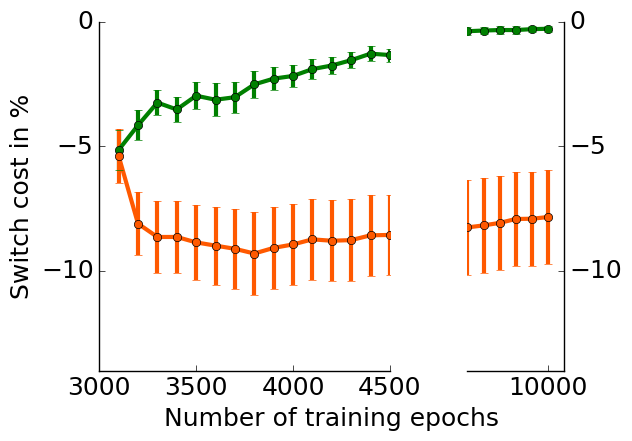

In [9]:
switch_cost_vs_time_split(epoch_per_loop, num_loop, matrices = good_matrices, individual = False, xlim1=(3000,4500),\
                    xlim2=(9500,10100), ylim= [-14,0], filename="figures/p2a=0.pdf")

## pro to anti proportion = 1.0

In [10]:
epoch_per_loop = 100
num_loop = 101
pro_block_matrix, pro_switch_matrix, anti_block_matrix, anti_switch_matrix \
    = np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop)),np.zeros((0,num_loop))
for i in range(10,110,10):
    try:
        matrices = load_weights("RatioTime/RatioTime-1.0-"+str(i)+".pkl")
    except IOError:
        continue
    pro_block, pro_switch, anti_block, anti_switch = matrices
    pro_block_matrix = np.append(pro_block_matrix, pro_block,axis=0)
    anti_block_matrix = np.append(anti_block_matrix, anti_block,axis=0)
    pro_switch_matrix = np.append(pro_switch_matrix, pro_switch,axis=0)
    anti_switch_matrix = np.append(anti_switch_matrix, anti_switch,axis=0)
matrices = [pro_block_matrix,anti_block_matrix,pro_switch_matrix,anti_switch_matrix]

In [11]:
threshold1= 0.9
threshold2=0.7
threshold3 = 0.95
good = np.logical_and(pro_block_matrix[:,-1] > threshold1,  anti_block_matrix[:,-1] > threshold1)
bad = np.logical_not(good)
criteria1 = np.logical_or(pro_switch_matrix[:,40] < threshold2, anti_switch_matrix[:,40] < threshold2)
criteria2 = np.logical_or(pro_switch_matrix[:,95] < threshold3, anti_switch_matrix[:,95] < threshold3)
late = np.logical_or(criteria1,criteria2)
good_late = np.logical_and(good, late)
early = np.logical_not(late)
good_early = np.logical_and(good, early)

good_pro_block = pro_block_matrix[good,:]
good_anti_block = anti_block_matrix[good,:]
good_pro_switch = pro_switch_matrix[good,:]
good_anti_switch = anti_switch_matrix[good,:]
good_matrices = [good_pro_block, good_pro_switch, 
                good_anti_block, good_anti_switch]

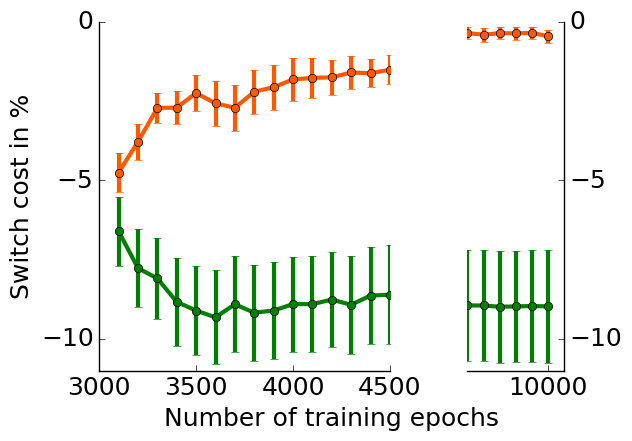

In [12]:
switch_cost_vs_time_split(epoch_per_loop, num_loop, matrices = good_matrices, individual = False, xlim1=(3000,4500),\
                    xlim2=(9500,10100), ylim= [-11,0], filename="figures/p2a=1.pdf")